## Lecture 3 - $2^{nd}$ December 2024

This notebook presentation is part of my lecture material for the Advanced Quantum Mechanics course at the University of Trieste. It contains a general introduction to Qiskit and Pennylane

**Michele Grossi**, Coordinator of Hybrid Quantum Computing Infrastracture and Algorithms @ CERN


## A small overview of Quantum Machine Learning
<br>
You can find a copy of this presentation at

https://github.com/grossiM/LAB_Quantum_Computation24/tree/main

michele.grossi@cern.ch

In [1]:
# !pip install qiskit-machine-learning
# !pip install scikit-learn

In [2]:
##Libraries check
# Install libraries if needed (uncomment if necessary)

import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import pennylane as qml
from pennylane import numpy as np

print("Qiskit version:", qiskit.__version__)
print("PennyLane version:", qml.__version__)

/Users/sebastianopian/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Qiskit version: 1.2.4
PennyLane version: 0.38.0


## Introduction

### Quantum vs. Classical Neural Networks

Classical neural networks are algorithmic models inspired by the human brain that can be trained to recognize patterns in data and learn to solve complex problems. They are based on a series of interconnected nodes, or *neurons*, organized in a layered structure, with parameters that can be learned by applying machine or deep learning training strategies.

The motivation behind quantum machine learning (QML) is to integrate notions from quantum computing and classical machine learning to open the way for new and improved learning schemes. QNNs apply this generic principle by combining classical neural networks and parametrized quantum circuits. Because they lie at an intersection between two fields, QNNs can be viewed from two perspectives:

- From a **machine learning perspective**, QNNs are, once again, algorithmic models that can be trained to find hidden patterns in data in a similar manner to their classical counterparts. These models can **load** classical data (**inputs**) into a quantum state, and later **process** it with quantum gates parametrized by **trainable weights**. Figure 1 shows a generic QNN example including the data loading and processing steps. The output from measuring this state can then be plugged into a loss function to train the weights through backpropagation.

- From a **quantum computing perspective**, QNNs are quantum algorithms based on parametrized quantum circuits that can be trained in a variational manner using classical optimizers. These circuits contain a **feature map** (with input parameters) and an **ansatz** (with trainable weights), as seen in Figure 1.


<div>
<img src="qnn_qiskit.jpeg" width="600" align="center"/>
</div>

*Figure 1. Generic quantum neural network (QNN) structure.*

## Qiskit and Quantum kernel
#### Classical kernels
Let us dive into classical machine learning and perform classification with classical kernels.

#### Motivation
In many cases, our data is not linearly separable. In the case of binary classification, this means that we cannot find a hyperplane in our feature space such that it perfectly separates the two classes.

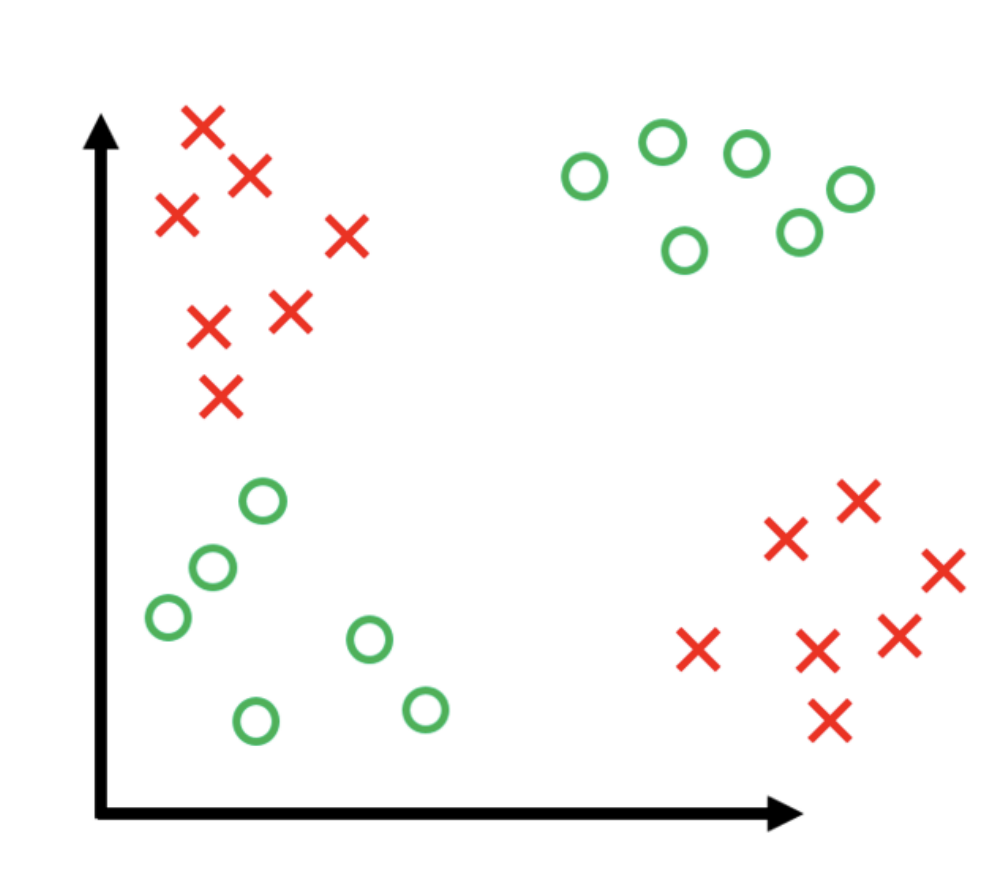



we will now see how a simple kernel can help us transform this data into a new space where it is lineraly separable.

#### Polynomial kernel
<p>The polynomial kernel is given by:</p>
<p><i>K(x, y)</i> = (<i>x</i> &middot; <i>y</i> + <i>c</i>)<sup><i>d</i></sup></p>
<p>where <i>x</i> and <i>y</i> are input vectors, <i>c</i> is a constant (often set to 1), and <i>d</i> is the degree of the polynomial.

This kernel function implicitly maps the inputs into a higher-dimensional space, allowing linear algorithms to find nonlinear patterns in the data.</p>

We demonstrate the power for the almost trivial case of d = 1, c = 0 in code.

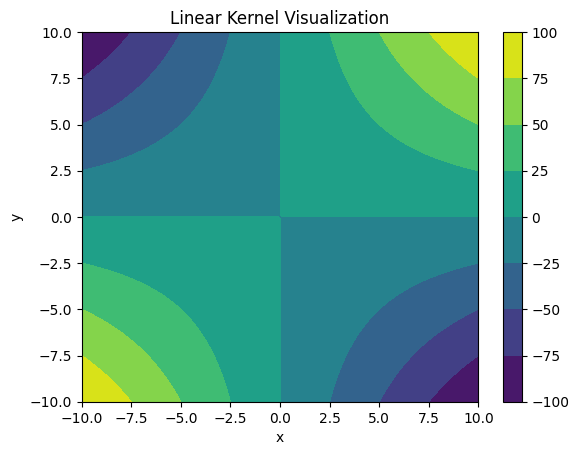

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x,y)
Z = X*Y

# Plot
plt.contourf(X, Y, Z)
plt.title('Linear Kernel Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

#### Kernel comparison (Exercise)
Idea: There are many different types of kernels, and often we have to find the best one for our specific dataset.

Task: Check the documentation of sklearn and evaluate kernels visually using the dataset and visualization tools prepared below.

Bonus question: How could we benchmark the kernels?

In [4]:
from sklearn.datasets import make_classification
from sklearn import svm

# Generate synthetic data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

In [5]:
def plot_svm(kernel):
    clf = svm.SVC(kernel=kernel, gamma='auto')
    clf.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(clf)
    plt.title('SVM with ' + kernel + ' kernel')
    plt.show()

def plot_svc_decision_function(clf):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    assert len(clf.support_vectors_) > 0, "No support vectors found!"
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               facecolors='none', edgecolors='k', marker='o')
    return


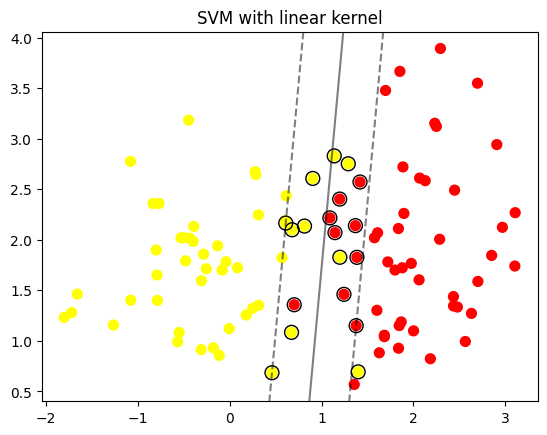

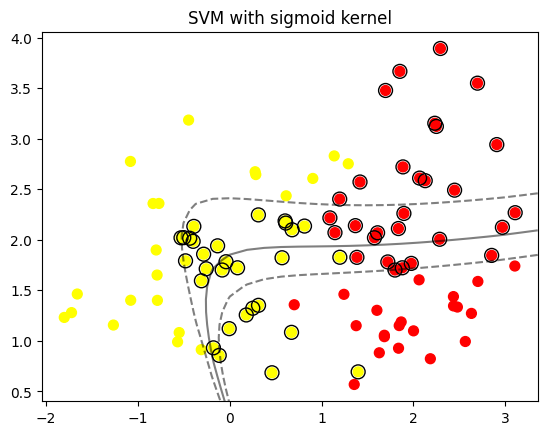

In [6]:
# Todo: Try the different kernels from sklearn.
plot_svm(kernel="linear")
plot_svm(kernel="sigmoid")

#### Non-linear data separation: RBF Kernel
<p>Another powerful kernel used in machine learning is the Radial Basis Function (RBF) kernel, also known as the Gaussian kernel:</p>
<p><i>K(x, y)</i> = exp(<sup><i>-||x - y||</i><sup>2</sup></sup> / (2<i>σ</i><sup>2</sup>))</p>
<p>where <i>σ</i> is the width of the Gaussian function. The RBF kernel is particularly useful as it can project data into an infinite-dimensional space, often making it linearly separable.</p>


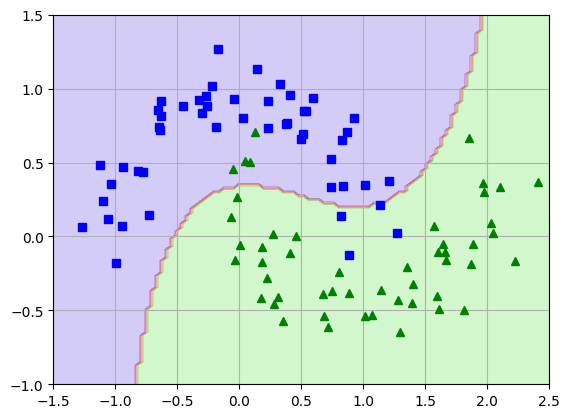

In [7]:
from sklearn.datasets import make_moons

# Generate synthetic data
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X, y)
plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

### Quantum Kernels in Qiskit
In this example, we'll encode the classical data point x=(−0.1,0.2) using the ZZFeatureMap in Qiskit.

In [8]:
from qiskit.circuit.library import ZZFeatureMap
import matplotlib.pyplot as plt

# Define the classical data.
x = [-0.15, 0.28]

# Setup the feature map and encode the data.
feature_map = ZZFeatureMap(feature_dimension=len(x), reps=1, insert_barriers=True)
encoded_data = feature_map.assign_parameters(x)

In [9]:
# Display the quantum circuit
print(encoded_data.decompose().draw('text'))

     ┌───┐ ░ ┌─────────┐                       
q_0: ┤ H ├─░─┤ P(-0.3) ├──■─────────────────■──
     ├───┤ ░ ├─────────┤┌─┴─┐┌───────────┐┌─┴─┐
q_1: ┤ H ├─░─┤ P(0.56) ├┤ X ├┤ P(18.838) ├┤ X ├
     └───┘ ░ └─────────┘└───┘└───────────┘└───┘


## Feature maps (Exercise)


**1. Explore Different Feature Maps:**

Using the ZFeatureMap and PauliFeatureMap classes in Qiskit, create quantum circuits that encode the same data point x as used in the example above. Compare the circuits with the one generated using ZZFeatureMap.

**2. Change Repetitions:**

Modify the number of repetitions (reps) in the ZZFeatureMap from the example. How does the circuit change? What effect might this have on encoding?
Encode Different Data Points: Choose two new data points and encode them using the ZZFeatureMap.

**3. Compare the resulting circuits:**

How does the circuit change with different data?


**Hints**

* For the ZFeatureMap, you may use the code ZFeatureMap(feature_dimension=len(x), reps=2) to create the map.

* For the PauliFeatureMap, you may use the code PauliFeatureMap(feature_dimension=len(x), reps=2, paulis=['Z', 'X']) to create the map.

* Remember to use bind_parameters to bind the data to the circuit, and print the circuit using print(circuit.decompose().draw('text')).

In the following we build a quantum kernel classification workflow using `qiskit-machine-learning`.
Let's define the dataset dimension and get our train and test subsets from qiskit:


In [10]:
from qiskit_machine_learning.datasets import ad_hoc_data

adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=5,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

The dataset looks like this:

<div>
<img src="https://qiskit-community.github.io/qiskit-machine-learning/_images/tutorials_03_quantum_kernel_10_0.png" width="600" align="center"/>
</div>


The next step is to create a quantum kernel instance that will help classify this data.

We use the `FidelityQuantumKernel` class, and pass two input arguments to its constructor:

- feature_map: in this case, a two-qubit ZZFeatureMap.
- fidelity: in this case, the ComputeUncompute fidelity subroutine that leverages the Sampler primitive.
NOTE: If you don’t pass a `Sampler` or `Fidelity` instance, then the instances of the reference Sampler and `ComputeUncompute` classes (found in qiskit.primitives) will be created by default.

In [11]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

/var/folders/b6/5cpxpg110g9cj088x4tmqb1h0000gn/T/ipykernel_16756/3912191764.py:8: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
/var/folders/b6/5cpxpg110g9cj088x4tmqb1h0000gn/T/ipykernel_16756/3912191764.py:10: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  fidelity = ComputeUncompute(sampler=sampler)


The quantum kernel can now be plugged into classical kernel methods, such as the SVC algorithm from scikit-learn. This algorithm allows us to define a custom kernel in two ways:

* by providing the kernel as a callable function (we focus on this)
* by precomputing the kernel matrix

In [12]:
from sklearn.svm import SVC

adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)

adhoc_svc.fit(train_features, train_labels)

adhoc_score_callable_function = adhoc_svc.score(test_features, test_labels)

print(f"Callable kernel classification test score: {adhoc_score_callable_function}")

Callable kernel classification test score: 1.0


## Regression example with Pennylane using a PQC

When writing any quantum computing program you must have in mind where it’s going to run. The place where you will run your program is called a`device`. For most problems the best you can do (given that current quantum computers can be noisy) is to begin by using a simulator. Since circuits can have different numbers of qubits (or wires), it’s important to define this when you define your device.

After defining your device you can define your `QNode`, which binds together the device with a Python function that implements a quantum circuit and returns a measurement. This syntax makes it easy to include parameters in your circuits. In the end the quantum computation is just a function that can depend on inputs and produces an output.

You can then define a cost function (which is also just a normal Python function) based on the output of your QNode. Hybrid models often include preprocessing or postprocessing, which can be arbitrarily complex. This means that we can add additional functions as simple as adding a constant or as complex as adding a full neural network. If you do want to use a neural network you can define it as a separate function, and then use it within your cost function.

The final step is to perform the optimization over the cost function. PennyLane has a lot of optimizers which you can choose from. The optimization part involves choosing an optimizer and a step size, making an initial guess for the value of your parameters, and then iterating over a number of defined steps. Finally you can print or graph the results of your optimization.

In summary, to create a quantum machine learning program in PennyLane you need to:

- Define a device including the device type and the number of wires.
- Define your quantum circuit (QNode).
- Define pre-/postprocessing (such as a neural network). (Optional)
- Define a cost function which takes in your quantum circuit and your neural network (if you have one).
- Perform the optimization
  * Choose an optimizer
  * Choose a step size
  * Make an initial guess for the value of your parameters
  * Iterate over a number of defined steps.
    

In [13]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Example data
X = np.random.random(100, requires_grad=False)
Y = X + np.random.random(100, requires_grad=False)/10

# Normalize or scale your features
X_normalized = (X - np.min(X)) / (np.max(X) - np.min(X))
Y_normalized = (Y - np.min(Y)) / (np.max(Y) - np.min(Y))

# Split into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y_normalized, test_size=0.2, random_state=42)


In [14]:
# Create the quantum device
dev = qml.device('default.qubit', wires=1)

# Define the quantum circuit
@qml.qnode(dev)
def quantum_circuit(datapoint, params):
    qml.RX(datapoint, wires=0)
    qml.Rot(params[0], params[1], params[2], wires=0)
    return qml.expval(qml.PauliZ(wires=0))

# Classical pre/postprocessing and loss function
def loss_func(predictions, targets):
    return np.mean(np.array([(predictions[i] - targets[i]) ** 2 for i in range(len(targets))]))

# Define the cost function
def cost_fn(params, X, Y):
    predictions = [quantum_circuit(x, params) for x in X]
    return loss_func(predictions, Y)

# Define the optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.3)

# Initialize parameters
params = np.array([0.1, 0.1, 0.1], requires_grad=True)



Step 0, Cost 0.3419876496979971
Step 10, Cost 0.1909090797874909
Step 20, Cost 0.08568150430352649
Step 30, Cost 0.03751887624284389
Step 40, Cost 0.019442712439859674
Step 50, Cost 0.012158305136840932
Step 60, Cost 0.008698748550154137
Step 70, Cost 0.006816600948246462
Step 80, Cost 0.005684290415724155
Step 90, Cost 0.0049505757200901165


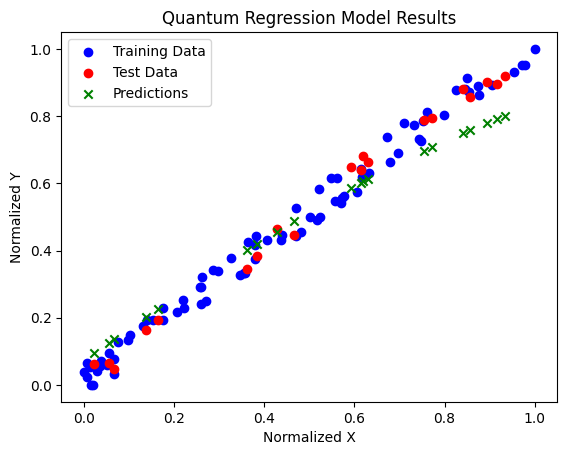

In [15]:
# Training loop
for i in range(100):
    #print("Params shape:", params.shape)  # Debug: Check params shape
    params, prev_cost = opt.step_and_cost(lambda p: cost_fn(p, X_train, Y_train), params)
    if i % 10 == 0:
        print(f'Step {i}, Cost {prev_cost}')

# Generate predictions for testing
test_predictions = [quantum_circuit(x, params) for x in X_test]

# Plotting results
plt.scatter(X_train, Y_train, color='blue', label='Training Data')
plt.scatter(X_test, Y_test, color='red', label='Test Data')
plt.scatter(X_test, test_predictions, color='green', label='Predictions', marker='x')
plt.xlabel("Normalized X")
plt.ylabel("Normalized Y")
plt.title("Quantum Regression Model Results")
plt.legend()
plt.show()

### Regression for $y=sin(x)$
The quantum model relies entirely on its parameterized gates to approximate the target function.

In [16]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Generate training data
X = np.linspace(0, 2 * np.pi, 20)  # 20 training points
Y = np.sin(X)

# Generate test data
X_test = np.linspace(0.1, 2 * np.pi + 0.1, 20)
Y_test = np.sin(X_test)

# Step 1: Set up the device
dev = qml.device("default.qubit", wires=1)

# Step 2: Define the quantum model 
@qml.qnode(dev)
def quantum_model(x, params):
    """Quantum model"""
    # Encode the input data as a single RX rotation
    qml.RX(x, wires=0)
    # Apply a single layer of trainable gates
    qml.Rot(params[0], params[1], params[2], wires=0)
    # Measure the expectation value of the PauliZ operator
    return qml.expval(qml.PauliZ(wires=0))



# Step 3: Define the loss function
def loss(params):
    predictions = [quantum_model(x, params) for x in X]
    return np.mean((np.array(predictions) - Y) ** 2)

# Step 4: Set up the optimizer and parameters
params = np.random.uniform(low=-0.1, high=0.1, size=3, requires_grad=True)  # Only 3 parameters
optimizer = qml.GradientDescentOptimizer(stepsize=0.3)

In [17]:
# Training loop
num_epochs = 100
loss_history = []

for epoch in range(num_epochs):
    params, current_loss = optimizer.step_and_cost(loss, params)
    loss_history.append(current_loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {current_loss}")

Epoch 0: Loss = 0.9994260936890816
Epoch 10: Loss = 0.3025521572425883
Epoch 20: Loss = 0.007862980546165223
Epoch 30: Loss = 0.0026315475443225646
Epoch 40: Loss = 0.001301441039510519
Epoch 50: Loss = 0.0007733779191891415
Epoch 60: Loss = 0.0005117506862017463
Epoch 70: Loss = 0.0003634252484456214
Epoch 80: Loss = 0.00027132304426058876
Epoch 90: Loss = 0.00021024958592272795


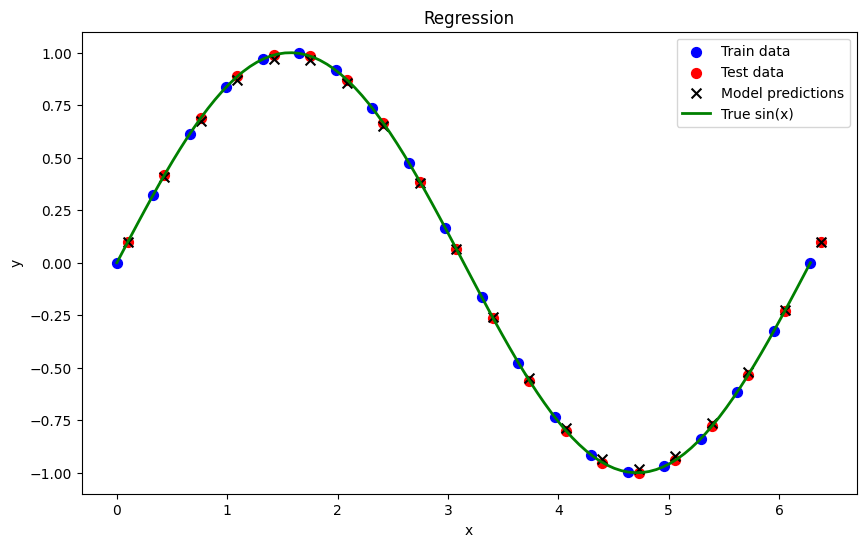

In [18]:
# Step 5: Evaluate on test data
test_predictions = [quantum_model(x, params) for x in X_test]

# Calculate smooth sine function for plotting
X_line = np.linspace(0, 2 * np.pi, 100)
Y_line = np.sin(X_line)

# Step 6: Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="blue", label="Train data", s=50)
plt.scatter(X_test, Y_test, color="red", label="Test data", s=50)
plt.scatter(X_test, test_predictions, color="black", label="Model predictions", s=50, marker="x")
plt.plot(X_line, Y_line, color="green", label="True sin(x)", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression")
plt.legend()
plt.show()

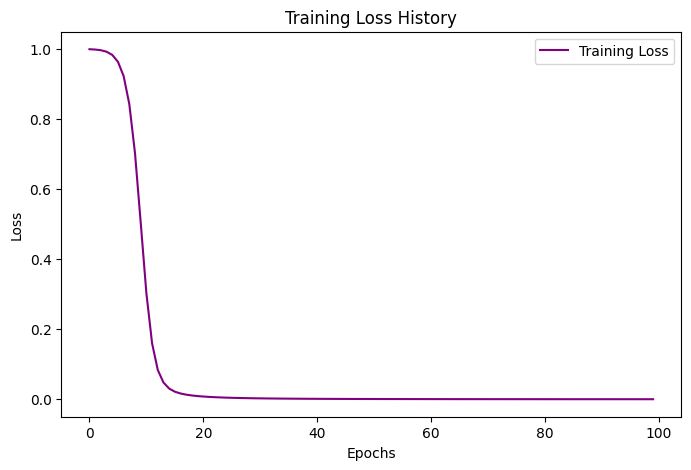

In [19]:
# Plot loss history
plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), loss_history, label="Training Loss", color="purple")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss History")
plt.legend()
plt.show()


## Exploring the Regime of Barren Plateaus with PennyLane

## **Overview**
Barren plateaus are a phenomenon in parameterized quantum circuits (PQCs) where the gradients of the cost function vanish exponentially as the number of qubits increases. This makes training variational quantum algorithms challenging. 

#### Why Do Barren Plateaus Occur?
- Random Initialization: PQCs with random parameters result in highly uniform distributions over the Hilbert space.
- Concentration of Measure: As the number of qubits increases, the gradient's magnitude concentrates around zero, a phenomenon related to the high-dimensional geometry of the parameter space.
- Expressibility: Highly expressible circuits exacerbate barren plateaus by creating uniform distributions over the state space.

#### Mitigation Strategies
- Structured Ansätze:
Use ansätze tailored to the problem, avoiding highly random or expressible circuits.
- Layer-wise Training:
Train the circuit incrementally by adding layers one at a time.
- Classical Pre-Training:
Use classical optimization techniques to initialize parameters closer to optimal solutions.
- Loss Function Design:
Reformulate loss functions to focus on specific parts of the solution space.


In the following we will:
1. Define a parameterized quantum circuit (PQC) using random initialization.
2. Compute the gradient of a simple cost function.
3. Analyze how the gradient variance changes with the number of qubits, demonstrating the barren plateau regime.

---

In [20]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)


#### Define the problem
We create a parameterized quantum circuit with n-qubits. We'll use random initialization for the parameters and a simple observable as the cost function.

In [21]:
def random_layer(weights, wires):
    """Applies a random layer of single-qubit rotations followed by entangling CNOT gates."""
    for i in range(len(wires)):
        qml.RX(weights[i, 0], wires=wires[i])
        qml.RY(weights[i, 1], wires=wires[i])
        qml.RZ(weights[i, 2], wires=wires[i])
    for i in range(len(wires) - 1):
        qml.CNOT(wires=[wires[i], wires[i + 1]])

def pqc(weights):
    """Parameterized Quantum Circuit (PQC)."""
    random_layer(weights, wires=range(len(weights)))


#### Cost Function and Gradient Calculation
We define a simple cost function using the expectation value of the 
Z-observable on the first qubit.

In [22]:
def cost_function(weights):
    """Cost function based on the expectation value of Z on the first qubit."""
    dev = qml.device("default.qubit", wires=weights.shape[0])
    
    @qml.qnode(dev)
    def circuit(weights):
        pqc(weights)
        return qml.expval(qml.PauliZ(0))
    
    return circuit(weights)

def compute_gradient(weights):
    """Compute the gradient of the cost function with respect to weights."""
    dev = qml.device("default.qubit", wires=weights.shape[0])
    
    @qml.qnode(dev)
    def circuit(weights):
        pqc(weights)
        return qml.expval(qml.PauliZ(0))
    
    grad_fn = qml.grad(circuit)
    return grad_fn(weights)


#### BP appearance
We analyze how the variance of gradients changes with the number of qubits.

In [23]:
num_qubits = [4, 6, 8, 10, 12]
num_samples = 50  # Number of random initializations
gradient_variances = []

for n in num_qubits:
    variances = []
    for _ in range(num_samples):
        # Random initialization of weights
        weights = np.random.uniform(0, 2 * np.pi, (n, 3))
        gradients = compute_gradient(weights)
        variances.append(np.var(gradients))
    gradient_variances.append(np.mean(variances))


#### Plotting Gradient Variance vs. Number of Qubits
We plot the average gradient variance as a function of the number of qubits to observe the barren plateau regime.

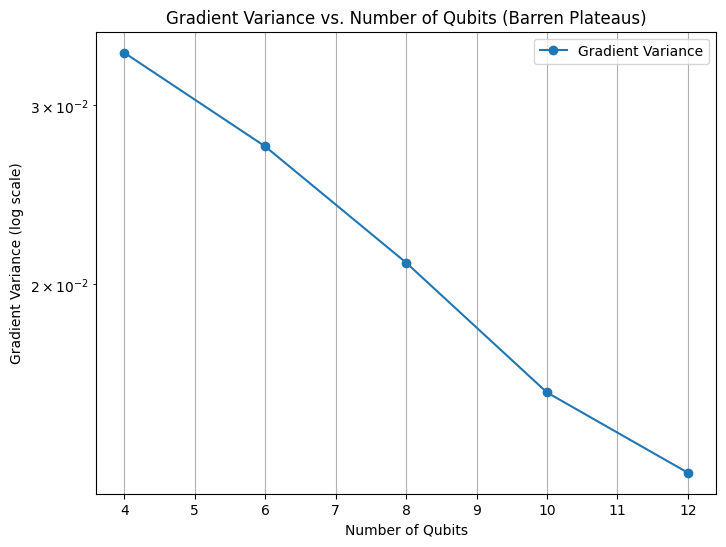

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(num_qubits, gradient_variances, marker="o", label="Gradient Variance")
plt.yscale("log")
plt.xlabel("Number of Qubits")
plt.ylabel("Gradient Variance (log scale)")
plt.title("Gradient Variance vs. Number of Qubits (Barren Plateaus)")
plt.grid(True)
plt.legend()
plt.show()

#### Discussion
As the number of qubits increases, the gradient variance decreases exponentially, demonstrating the barren plateau phenomenon.
This effect makes it challenging to train PQCs on larger systems due to vanishing gradients.


### **Symmetries in the Structured Ansatz**

#### **1. Symmetries in the Circuit Design**

#### **Rotational Symmetry (Single-Qubit Gates)**
The ansatz applies **single-qubit rotations** $ R_Y $ uniformly to all qubits. This ensures:
- **Parity symmetry**: Rotations along $ R_Y $ do not break the symmetry of the computational basis (e.g., parity between 0 and 1 states).
- **Uniform treatment**: Every qubit starts with the same type of operation, respecting symmetry in cases where the problem Hamiltonian has uniform characteristics.

---

#### **Translational Symmetry (Entanglement Pattern)**
The **nearest-neighbor entanglement pattern** introduces translational invariance:
- **Local interactions**: Mimics many physical systems like spin chains (e.g., the Ising or Heisenberg models), where interactions are local.
- **Equivalent treatment**: Each qubit interacts with its nearest neighbors in the same way, preserving translational invariance in space.

Additionally, the **cyclic wrap-around connection** enforces:
- **Periodic boundary conditions**: Important in systems with translational invariance or rotational symmetry.

---

#### **Limited Expressibility**
By using $ R_Y $-rotations instead of arbitrary three-parameter rotations $( RX, RY, RZ )$, the ansatz:
- **Restricts the parameter space**: Prevents the creation of random superpositions that might violate the problem's symmetry.
- **Avoids over-parametrization**: Reduces the likelihood of barren plateaus by limiting unnecessary complexity in the circuit.

---

### **2. Physical Connection to Symmetries**

#### **Hamiltonian Symmetry**
Many quantum problems involve Hamiltonians with specific symmetries, such as:
- **Parity symmetry**: Found in the Ising model, where flipping all spins leaves the Hamiltonian unchanged.
- **Rotational invariance**: Common in quantum chemistry and condensed matter systems.

see https://arxiv.org/abs/2403.07100

The structured ansatz:
- Aligns with these symmetries by avoiding gate configurations that explicitly break them.
- Ensures that the circuit explores states compatible with the problem's structure.

---

#### **Reduction in Hilbert Space**
By respecting symmetries:
- The optimization process is restricted to a smaller, meaningful subspace of the Hilbert space.
- This reduces exploration in irrelevant regions, avoiding configurations that average gradients to zero (a hallmark of barren plateaus).

---

### **3. Why Does This Mitigate Barren Plateaus?**

#### **Preserved Symmetries**
The structured ansatz ensures:
- The variational search is constrained to meaningful subspaces.
- Gradients do not vanish due to uniform exploration of high-dimensional irrelevant spaces.

#### **Structured Initialization**
- The ansatz applies systematic, symmetry-respecting transformations, like $ R_Y $-rotations and localized entanglement.
- This reduces the likelihood of initialization in barren plateau regions.

---

### **4. Connection to Symmetry Groups**

The structured ansatz reflects principles from **group theory**, which describes symmetries in quantum systems:
- **Rotational symmetry**: The $ R_Y $-rotations correspond to a subgroup of the $ SU(2)$ rotation group.
- **Translational symmetry**: The entangling gates respect invariance under certain spatial operations, such as periodic boundaries.

By encoding these symmetries, the ansatz stays "aligned" with the natural structure of the quantum problem, aiding both optimization and interpretability.

---

### **5. Key Takeaways**
- **Rotational symmetry** is achieved through uniform single-qubit rotations.
- **Translational symmetry** is ensured via nearest-neighbor and cyclic entanglement.
- These design choices limit expressibility, align the ansatz with problem-specific symmetries, and mitigate the barren plateau phenomenon.

### Looking into a Structured Ansatz


The following ansatz respects symmetries and avoids random initialization across the entire Hilbert space (actually an Hardware-Efficient Ansatz)

In [25]:
def structured_ansatz(weights, wires):
    """Structured Ansatz with a problem-specific layer structure."""
    for i in wires:
        qml.RY(weights[i], wires=i)  # Apply a single rotation per qubit

    # Entangling gates with nearest-neighbor pattern
    for i in range(len(wires) - 1):
        qml.CNOT(wires=[i, i + 1])

    # Wrap-around CNOT for cyclic entanglement
    qml.CNOT(wires=[len(wires) - 1, 0])


In [26]:
def cost_function_structured(weights):
    """Cost function for the structured ansatz."""
    dev = qml.device("default.qubit", wires=len(weights))
    
    @qml.qnode(dev)
    def circuit(weights):
        structured_ansatz(weights, wires=range(len(weights)))
        return qml.expval(qml.PauliZ(0))
    
    return circuit(weights)

def compute_gradient_structured(weights):
    """Compute the gradient of the structured ansatz."""
    dev = qml.device("default.qubit", wires=len(weights))
    
    @qml.qnode(dev)
    def circuit(weights):
        structured_ansatz(weights, wires=range(len(weights)))
        return qml.expval(qml.PauliZ(0))
    
    grad_fn = qml.grad(circuit)
    return grad_fn(weights)


In [27]:
## Compare Structured Ansatz and Random Ansatz
num_qubits = [4, 6, 8, 10, 12]
num_samples = 50
gradient_variances_random = []
gradient_variances_structured = []

# Analyze the random ansatz
for n in num_qubits:
    variances = []
    for _ in range(num_samples):
        weights = np.random.uniform(0, 2 * np.pi, (n, 3))  # Random weights
        gradients = compute_gradient(weights)
        variances.append(np.var(gradients))
    gradient_variances_random.append(np.mean(variances))

# Analyze the structured ansatz
for n in num_qubits:
    variances = []
    for _ in range(num_samples):
        weights = np.random.uniform(0, 2 * np.pi, n)  # Random weights
        gradients = compute_gradient_structured(weights)
        variances.append(np.var(gradients))
    gradient_variances_structured.append(np.mean(variances))


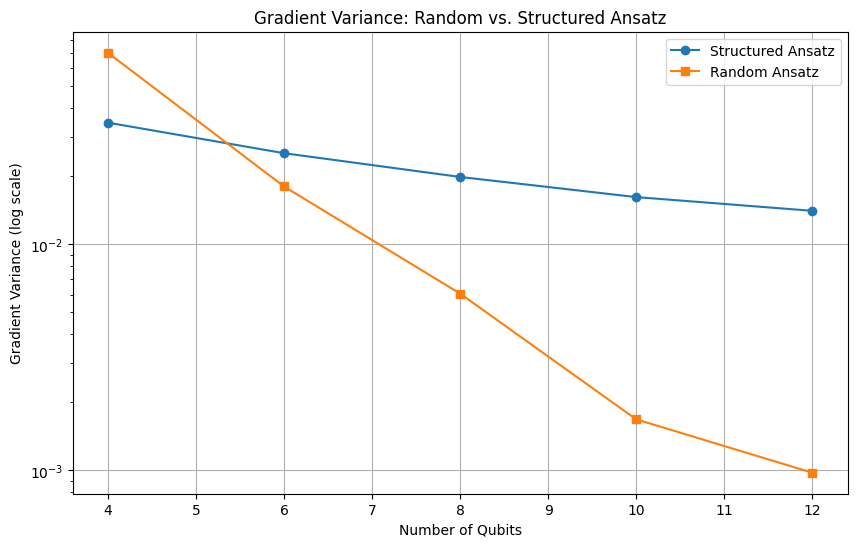

In [28]:
## Plot the result

plt.figure(figsize=(10, 6))
plt.plot(num_qubits, gradient_variances_random, marker="o", label="Structured Ansatz")
plt.plot(num_qubits, gradient_variances_structured, marker="s", label="Random Ansatz")
plt.yscale("log")
plt.xlabel("Number of Qubits")
plt.ylabel("Gradient Variance (log scale)")
plt.title("Gradient Variance: Random vs. Structured Ansatz")
plt.grid(True)
plt.legend()
plt.show()


### Extra on Quantum Gradients with BackPropagation

Any quantum device, whether a hardware device or a simulator can be trained using the **parameter-shift rule**

-----

### Parameter-shift rule

The output of a variational circuit (i.e the expectation of an observable) can be written as **quantum function** $f(\theta)$ parameterized by $\theta = \theta_1 , \theta_2...$

The partial derivative of $f(\theta)$ can in many cases be expressed as a linear combination of other quantum functions. Importantly, these other quantum functions typically use the same circuit, differing only in the shift of the argument. This means that partial derivatives of a variational circuit can be computed by using the same variational circuit architecture.

Recipes of how to get partial derivatives by evaluated parameter-shifted instances of a variational circuit are called parameter-shift rules, and have been first introduced to quantum machine learning in [Mitarai et al. (2018)](https://arxiv.org/abs/1803.00745), and extended in [Schuld et al. (2018)](https://arxiv.org/abs/1811.11184).



<img src="https://pennylane.ai/static/f3aa82b497cd5cad346bca8bb8f783f1/6244b/gradients.png" />

Making a rough analogy to classically computable functions, this is similar to how the derivative of the function $f(x) = \sin(x)$ is identical to $\frac{1}{2} \sin(x +\frac{\pi}{2}) - \frac{1}{2} \sin(x - \frac{\pi}{2})$.

So the same underlying algorithm can be reused to compute both $\sin(x)$ and its derivative by evaluating at $x \pm \frac{\pi}{2}$. This inituition holds for many quantum functions of interest :  

*the same circuit can be used to compute both the quantum function and the gradient of the quantum function.*

#### A more technical explaination

Quantum Circuits are specified by sequence of gates. The unitary transformation carried out by the circuit thus be broken down into a product of unitaries:

$$U(x; \theta) = U_N(\theta_{N}) U_{N-1}(\theta_{N-1}) \cdots U_i(\theta_i) \cdots U_1(\theta_1) U_0(x).$$

Each of these gates is unitary, and therefore must have the form $U_{j}(\gamma_j)=\exp{(i\gamma_j H_j)}$ where $H_j$ is the Hermitian operator which generates the gate and $\gamma_j$ is the gate parameter.





#### A single Parameterised gate

Let us single out a single parameter $\theta_i$ and its associated gate $U_i(\theta_i)$, For simplicity we remove all gates except $U_i(\theta)$ and $U_o(x)$ for the moment. In this case, we have a simplified quantum circuit function

$$f(x; \theta_i) = \langle 0 | U_0^\dagger(x)U_i^\dagger(\theta_i)\hat{B}U_i(\theta_i)U_0(x) | 0 \rangle = \langle x | U_i^\dagger(\theta_i)\hat{B}U_i(\theta_i) | x \rangle.$$

For convenience, we rewrite the unitary conjugation as a linear transformation $\mathcal{M}_{\theta_i}$ acting on the operator $\hat{B}$

$$U_i^\dagger(\theta_i)\hat{B}U_i(\theta_i) = \mathcal{M}_{\theta_i}(\hat{B}).$$

The transformation $\mathcal{M}_{\theta_i}$ , depends smoothly on the parameter $\theta_i$, so this qunatum function will have a well-defined gardient:

$$\nabla_{\theta_i}f(x; \theta_i) = \langle x | \nabla_{\theta_i}\mathcal{M}_{\theta_i}(\hat{B}) | x \rangle \in \mathbb{R}.$$

The key insight is that we can, in many cases of interest, express this gradient as a linear combination of the same transformation $\mathcal{M}$, but with different parameters. Namely,

$$\nabla_{\theta_i}\mathcal{M}_{\theta_i}(\hat{B}) = c[\mathcal{M}_{\theta_i + s}(\hat{B}) - \mathcal{M}_{\theta_i - s}(\hat{B})],$$

where the multiplier $c$ and the shift $s$ are determined completely by the type of transformation $\mathcal{M}$ and independent of the value of $\theta_i$





#### Multiple Parameterized Gates

To complete the story, we now go back to the case where there are many gates in the circuit. We can absorb any gates applied before gate i into the initial state:

$$|\psi_{i-1}\rangle = U_{i-1}(\theta_{i-1}) \cdots U_{1}(\theta_{1})U_{0}(x)|0\rangle$$

Similarly, any gates applied after gate $i$ are combined with the observable $\hat{B}$:

$$\hat{B}_{i+1} = U_{N}^\dagger(\theta_{N}) \cdots U_{i+1}^\dagger(\theta_{i+1}) \hat{B} U_{i+1}(\theta_{i+1}) \cdots U_{N}(\theta_{N}) $$

With this simplification, the quantum circuit function becomes

$$ f(x; \theta) = \langle \psi_{i-1} | U_i^\dagger(\theta_i) \hat{B}_{i+1} U_i(\theta_i) | \psi_{i-1} \rangle = \langle \psi_{i-1} | \mathcal{M}_{\theta_i} (\hat{B}_{i+1}) | \psi_{i-1} \rangle,$$

and its gradient is 

$$ \nabla_{\theta_i}f(x; \theta) = \langle \psi_{i-1} | \nabla_{\theta_i}\mathcal{M}_{\theta_i} (\hat{B}_{i+1}) | \psi_{i-1} \rangle.$$

This gradient has the exact same form as the single-gate case, except we modify the state $|x⟩ → |\psi_{i-1}⟩$ and the measurement operator $\hat{B}\rightarrow\hat{B}_{i+1}$. In terms of the circuit, this means we can leave all other gates as they are, and only modify gate $U(\theta_i)$ when we want to differentiate with respect to the paramter $\theta_i$

------
------


## additional and nice references
https://pennylane.ai/search?categories=quantum%20machine%20learning&sort=publication_date&contentType=DEMO

https://pennylane.ai/qml/demos/tutorial_qnn_multivariate_regression

Epoch 0: Loss = 1.001760038608611
Epoch 10: Loss = 0.34162557027043705
Epoch 20: Loss = 0.06553381060246785
Epoch 30: Loss = 0.008738835957095997
Epoch 40: Loss = 0.004001093349437118
Epoch 50: Loss = 0.0030393161271211042
Epoch 60: Loss = 0.002617988357895287
Epoch 70: Loss = 0.00237490675285205
Epoch 80: Loss = 0.0022179400213118857
Epoch 90: Loss = 0.0021091140036321706


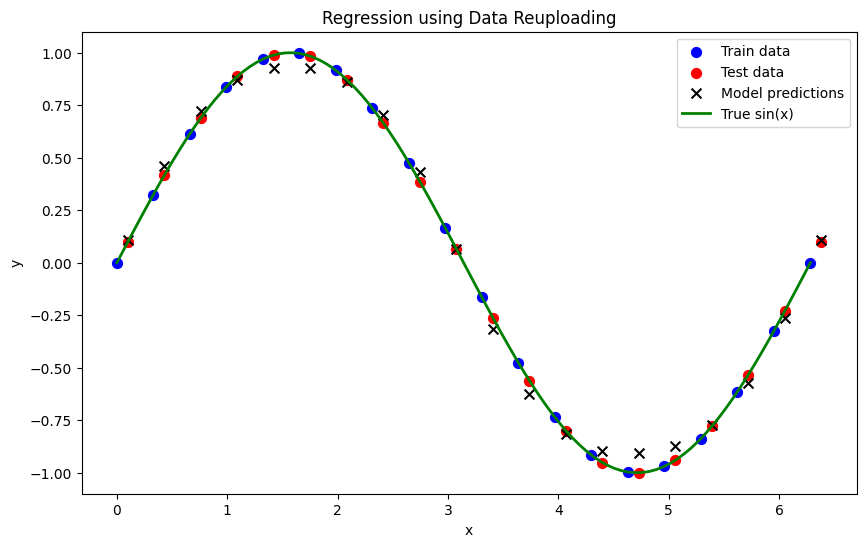

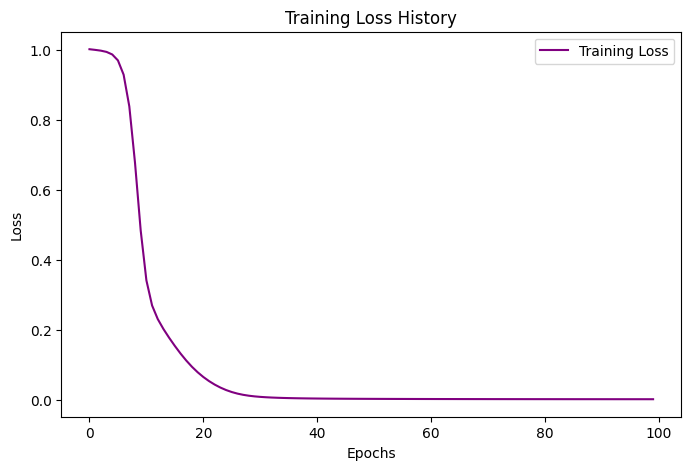

In [29]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Generate training data
X = np.linspace(0, 2 * np.pi, 20)  # 20 training points
Y = np.sin(X)

# Generate test data
X_test = np.linspace(0.1, 2 * np.pi + 0.1, 20)
Y_test = np.sin(X_test)

# Step 1: Set up the device
dev = qml.device("default.qubit", wires=1)

# Step 2: Define the quantum model with data reuploading
def data_reuploading_circuit(x, params):
    """Quantum model with data reuploading."""
    for layer in range(len(params) // 3):
        # Data encoding
        qml.RX(x, wires=0)  
        # Trainable layer
        qml.Rot(params[3*layer], params[3*layer + 1], params[3*layer + 2], wires=0)
    return qml.expval(qml.PauliZ(wires=0))

# Create a QNode
@qml.qnode(dev)
def quantum_model(x, params):
    return data_reuploading_circuit(x, params)

# Step 3: Define the loss function
def loss(params):
    predictions = [quantum_model(x, params) for x in X]
    return np.mean((np.array(predictions) - Y) ** 2)

# Step 4: Set up the optimizer and parameters
num_layers = 3  # Number of data reuploading layers
params = np.random.uniform(low=-0.1, high=0.1, size=(num_layers * 3), requires_grad=True)
optimizer = qml.GradientDescentOptimizer(stepsize=0.3)

# Training loop
num_epochs = 100
loss_history = []

for epoch in range(num_epochs):
    params, current_loss = optimizer.step_and_cost(loss, params)
    loss_history.append(current_loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {current_loss}")

# Step 5: Evaluate on test data
test_predictions = [quantum_model(x, params) for x in X_test]

# Calculate smooth sine function for plotting
X_line = np.linspace(0, 2 * np.pi, 100)
Y_line = np.sin(X_line)

# Step 6: Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="blue", label="Train data", s=50)
plt.scatter(X_test, Y_test, color="red", label="Test data", s=50)
plt.scatter(X_test, test_predictions, color="black", label="Model predictions", s=50, marker="x")
plt.plot(X_line, Y_line, color="green", label="True sin(x)", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression using Data Reuploading")
plt.legend()
plt.show()

# Plot loss history
plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), loss_history, label="Training Loss", color="purple")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss History")
plt.legend()
plt.show()
